<a href="https://colab.research.google.com/github/Nico7832/FP/blob/main/NoteBook_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# On lit le fichier avec toutes la data
df = pd.read_csv("valeursfoncieres-2022.txt", delimiter='|', low_memory=False,error_bad_lines=False)

<ipython-input-90-ca68f98b74e0>:7: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





On vérifie que le fichier a bien été lu en affichant le début du fichier et on vérifie le type

In [ ]:

pd.set_option("display.max_columns", None)
print(df.head(0))
print(type(df))

Empty DataFrame
Columns: [Identifiant de document, Reference document, 1 Articles CGI, 2 Articles CGI, 3 Articles CGI, 4 Articles CGI, 5 Articles CGI, No disposition, Date mutation, Nature mutation, Valeur fonciere, No voie, B/T/Q, Type de voie, Code voie, Voie, Code postal, Commune, Code departement, Code commune, Prefixe de section, Section, No plan, No Volume, 1er lot, Surface Carrez du 1er lot, 2eme lot, Surface Carrez du 2eme lot, 3eme lot, Surface Carrez du 3eme lot, 4eme lot, Surface Carrez du 4eme lot, 5eme lot, Surface Carrez du 5eme lot, Nombre de lots, Code type local, Type local, Identifiant local, Surface reelle bati, Nombre pieces principales, Nature culture, Nature culture speciale, Surface terrain]
Index: []
<class 'pandas.core.frame.DataFrame'>


On nettoie les données

In [ ]:

df = df.dropna()
df = df.drop_duplicates()


# Section 2 

Commençons par des petites statistiques simples pour mieux comprendre le fichier
Nombre de ligne (on prend un échantillon de df car df est trop volumineux et panda n'a pas assez de mémoire pour lire toutes les lignes, donc on étudie un échantillon)


In [ ]:
echantillon =df.head(50)
echantillon.shape[0]

50

Nombre de colonnes dans df

In [ ]:

df.shape[1]

43

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426968 entries, 0 to 426967
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Identifiant de document     0 non-null       float64
 1   Reference document          0 non-null       float64
 2   1 Articles CGI              0 non-null       float64
 3   2 Articles CGI              0 non-null       float64
 4   3 Articles CGI              0 non-null       float64
 5   4 Articles CGI              0 non-null       float64
 6   5 Articles CGI              0 non-null       float64
 7   No disposition              426968 non-null  int64  
 8   Date mutation               426968 non-null  object 
 9   Nature mutation             426968 non-null  object 
 10  Valeur fonciere             426079 non-null  object 
 11  No voie                     275794 non-null  float64
 12  B/T/Q                       18531 non-null   object 
 13  Type de voie  

In [ ]:
df.index

Int64Index([], dtype='int64')

# Section 3

Visuel interactif

In [ ]:
import plotly.express as px

dth, rec, act = '#9b59b6', '#8e44ad', '#e74c3c'

# Conversion de la colonne 'Date mutation' au format datetime
df['Date mutation'] = pd.to_datetime(df['Date mutation'])

# Comptage des mutations par date
temp = df.groupby('Date mutation').size().reset_index(name='Nb de mutation')

# Mise en forme des données pour le graphique
temp = temp.melt(id_vars="Date mutation", value_vars=['Nb de mutation'],
                 var_name='Variable', value_name='Nb de mutation')

# Création du graphique
fig = px.area(temp, x="Date mutation", y="Nb de mutation", color='Variable',
              title='Nombre de mutations par date', color_discrete_sequence=[rec])

fig.show()

<ipython-input-48-a2b1ef079839>:6: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-48-a2b1ef079839>:12: FutureWarning:

This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.



Code interactif


#Section 4

**Histogramme de la valeur foncière**

Cet histogramme permet de visualiser la distribution des valeurs foncières des transactions immobilières dans le fichier. Cela peut aider à identifier les tendances du marché immobilier dans cette région.

On remplace dans Valeur foncière toutes les ',' par des'.' afin de pouvoir convertir les valeurs en float et les analyser. On supprime aussi toutes les potentiels valeurs nulles dans la colonne


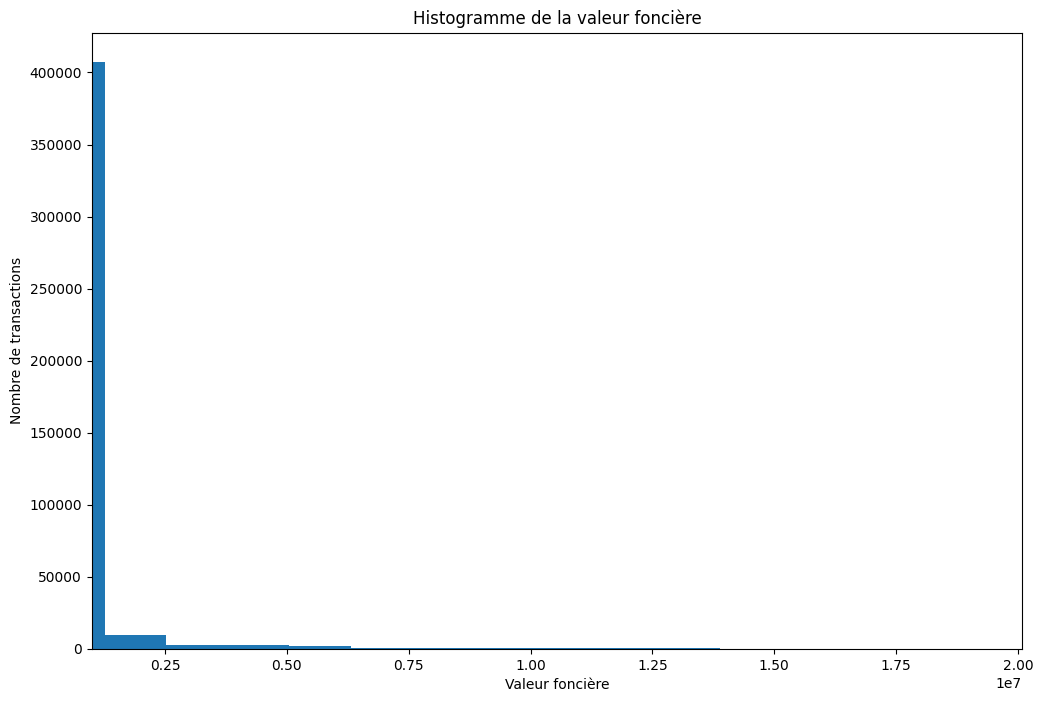

In [ ]:
# Conversion de la colonne "Valeur fonciere" en type string
df["Valeur fonciere"] = df["Valeur fonciere"].astype(str)

# Remplacement des virgules par des points et conversion en float
df["Valeur fonciere"] = df["Valeur fonciere"].str.replace(',', '.').astype(float)

# Suppression des lignes avec des valeurs manquantes pour la colonne "Valeur fonciere"
df = df.dropna(subset=["Valeur fonciere"])


df = df.dropna(subset=["Valeur fonciere"])
#Création de l'histogramme de la valeur foncière

valeurs_foncieres = df['Valeur fonciere']
plt.figure(figsize=(12, 8))
plt.hist(valeurs_foncieres, bins=190)
plt.title('Histogramme de la valeur foncière')
plt.xlabel('Valeur foncière')
plt.ylabel('Nombre de transactions')
plt.xlim(1000000, 20081800)
plt.show()



Diagramme en barres de la nature de la mutation

Ce diagramme permet de visualiser le nombre de transactions immobilières selon la nature de la mutation (vente, donation, échange, etc.). Cela peut aider à identifier les types de transactions les plus courantes dans la région.


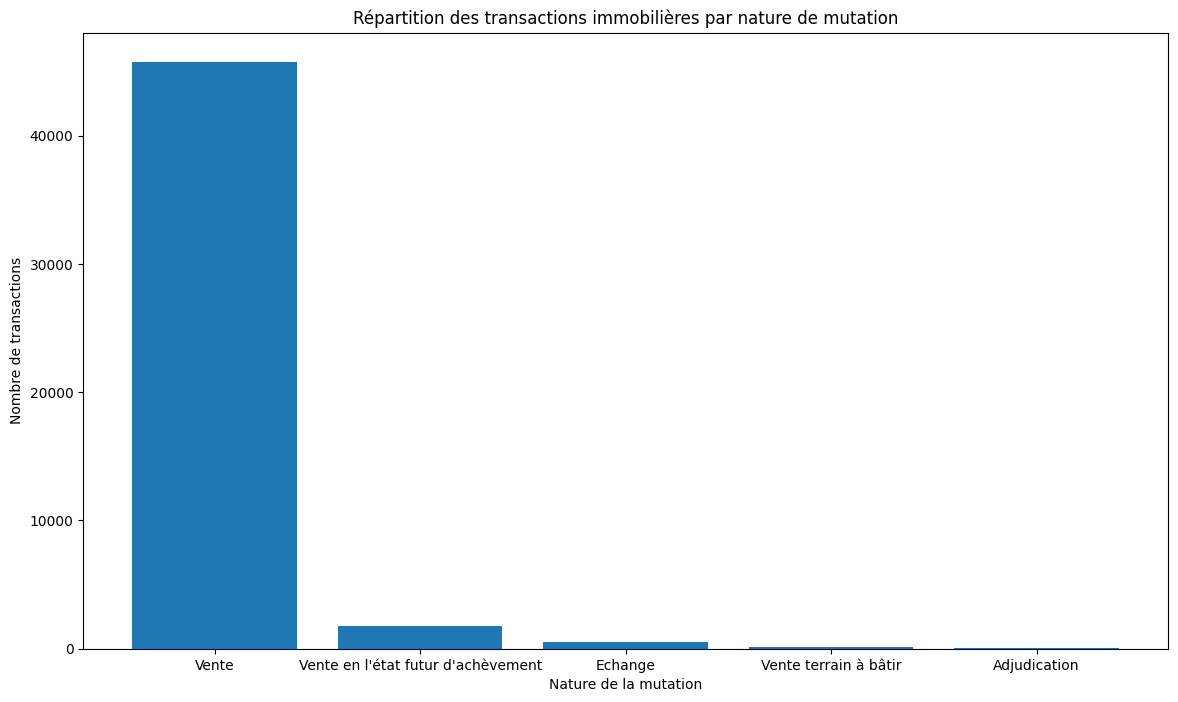

In [ ]:
# Supprimer les lignes contenant des valeurs NaN dans la colonne "Valeur fonciere"
df = df.dropna(subset=["Nature mutation"])


# ## Création d'un DataFrame contenant le nombre de transactions pour chaque nature de mutation
mutations = df['Nature mutation'].value_counts()
plt.figure(figsize=(14,8))
# # Création du diagramme en barres
plt.bar(mutations.index, mutations.values)
#
# # Ajout de labels et de titres
#
plt.xlabel('Nature de la mutation')
plt.ylabel('Nombre de transactions')
plt.title('Répartition des transactions immobilières par nature de mutation')
#
# # Affichage du diagramme
plt.show()

Nuage de points de la surface réelle bâtie par rapport à la valeur foncière

Ce nuage de points permet de visualiser la relation entre la surface réelle bâtie et la valeur foncière des biens immobiliers. Cela peut aider à identifier les tendances de prix en fonction de la taille de la propriété.


In [ ]:
df["Surface reelle bati"] = df["Surface reelle bati"].astype(float)



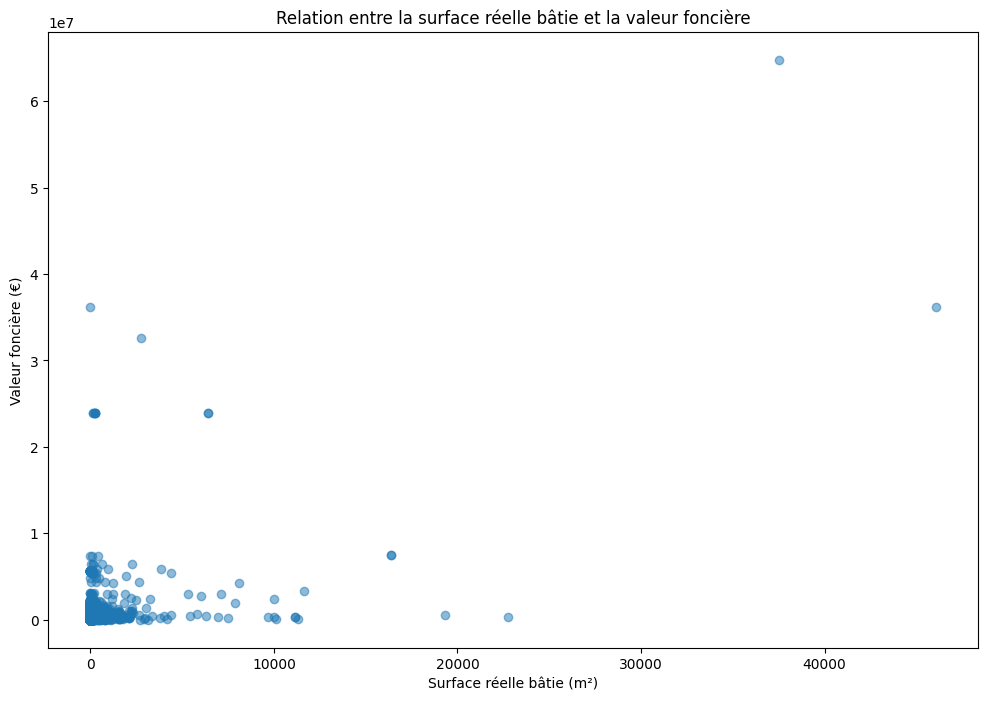

In [ ]:
plt.figure(figsize=(12,8))
# Créer le nuage de points
plt.scatter(df["Surface reelle bati"], df["Valeur fonciere"], alpha=0.5)

# Ajouter des titres et des étiquettes d'axes
plt.xlabel("Surface réelle bâtie (m²)")
plt.ylabel("Valeur foncière (€)")
plt.title("Relation entre la surface réelle bâtie et la valeur foncière")

# Afficher le graphe
plt.show()




Ce graphique indique qu'il y a une forte concentration de petites propriétés avec une valeur foncière relativement faible dans votre ensemble de données. Les points en bas à gauche du graphique représentent probablement les propriétés les plus petites avec les valeurs foncières les plus faibles, tandis que les points sur la gauche et le bas du graphique représentent des propriétés plus grandes avec des valeurs foncières légèrement plus élevées.

**Afficher une carte des position des propriétés**


In [ ]:
import folium
from geopy.geocoders import Nominatim

# Supprimer les transactions avec une valeur foncière nulle ou négative
df = df[df['Valeur fonciere'] > 0]

# Centrer la carte sur une région donnée
latitude = 45.764043
longitude = 4.835659
m = folium.Map(location=[latitude, longitude], zoom_start=12)

# Créer un géocodeur Nominatim
geolocator = Nominatim(user_agent="my_app")

# Ajouter un marqueur pour chaque transaction immobilière
for index, row in df.iterrows():
    commune = row['Commune']
    location = geolocator.geocode(commune)
    if location:
        folium.Marker(location=[location.latitude, location.longitude],
                      popup=str(row['Valeur fonciere'])).add_to(m)

# Afficher la carte
m


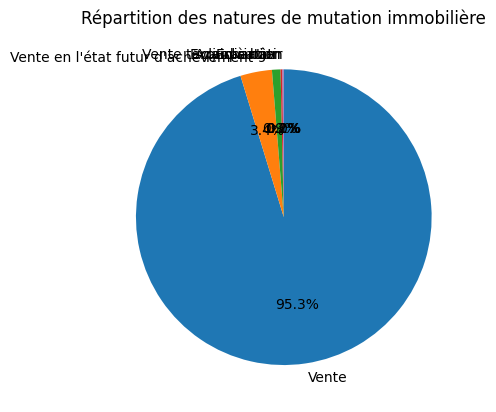

In [ ]:
# Sélectionner la colonne 'Nature mutation' et compter les occurrences de chaque nature de mutation
natures = df['Nature mutation'].value_counts()

# Créer le diagramme en rosace
plt.pie(natures.values, labels=natures.index, startangle=90, counterclock=False, autopct='%1.1f%%')

# Définir le titre du diagramme
plt.title('Répartition des natures de mutation immobilière')

# Afficher le diagramme en rosace
plt.show()

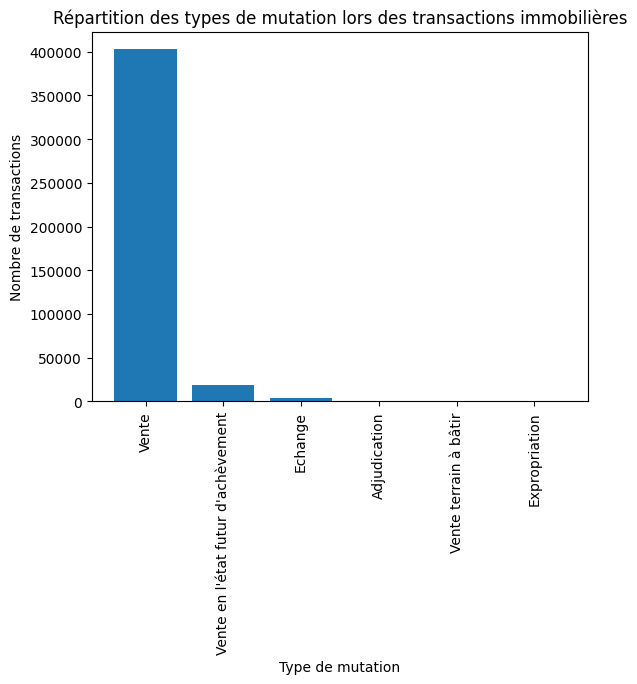

In [ ]:
# Sélectionner la colonne 'Nature mutation' et compter les occurrences de chaque type
mutations = df['Nature mutation'].value_counts()

# Créer le diagramme en barres empilées
plt.bar(mutations.index, mutations.values)

# Définir les titres et étiquettes des axes
plt.title('Répartition des types de mutation lors des transactions immobilières')
plt.xlabel('Type de mutation')
plt.ylabel('Nombre de transactions')

# Faire pivoter les étiquettes des xticks pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le diagramme
plt.show()


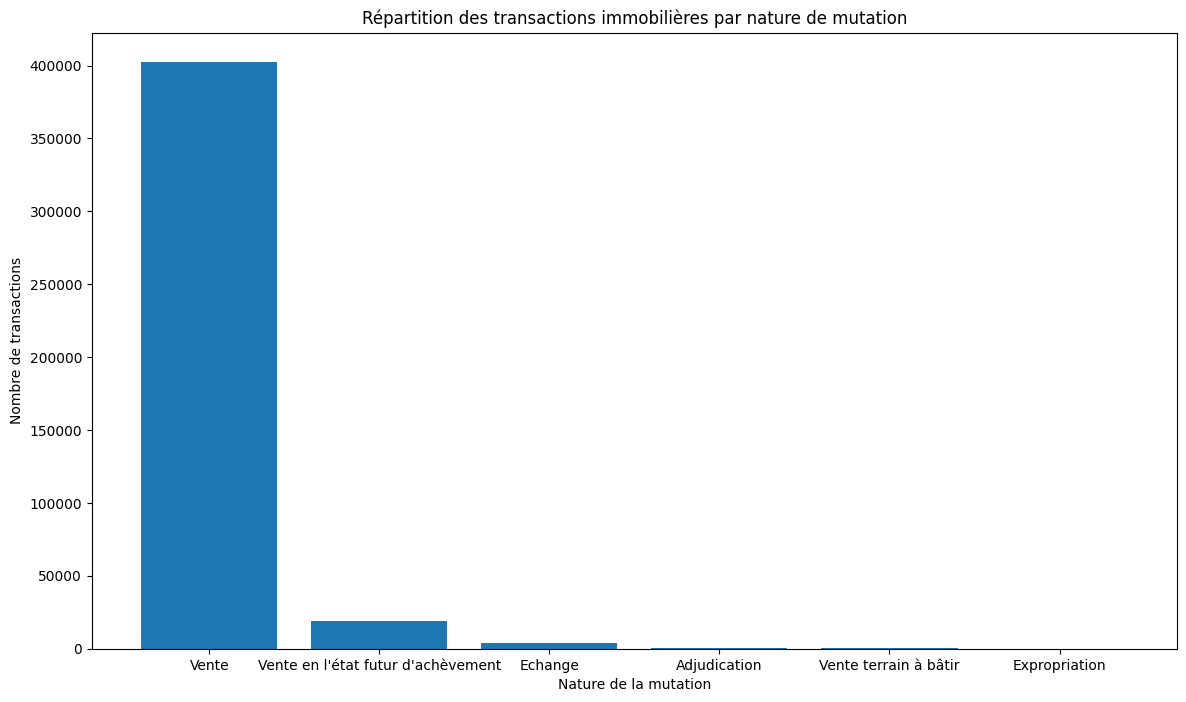

In [ ]:
# Supprimer les lignes contenant des valeurs NaN dans la colonne "Valeur fonciere"
df = df.dropna(subset=["Nature mutation"])


# ## Création d'un DataFrame contenant le nombre de transactions pour chaque nature de mutation
mutations = df['Nature mutation'].value_counts()
plt.figure(figsize=(14,8))
# # Création du diagramme en barres
plt.bar(mutations.index, mutations.values)
#
# # Ajout de labels et de titres
#
plt.xlabel('Nature de la mutation')
plt.ylabel('Nombre de transactions')
plt.title('Répartition des transactions immobilières par nature de mutation')
#
# # Affichage du diagramme
plt.show()

**Diagramme circulaire du nombre de lots par type de local**

Ce diagramme permet de visualiser la répartition des types de locaux (appartements, maisons, locaux commerciaux, etc.) dans les transactions immobilières. Cela peut aider à identifier les types de propriétés les plus courantes dans la région.


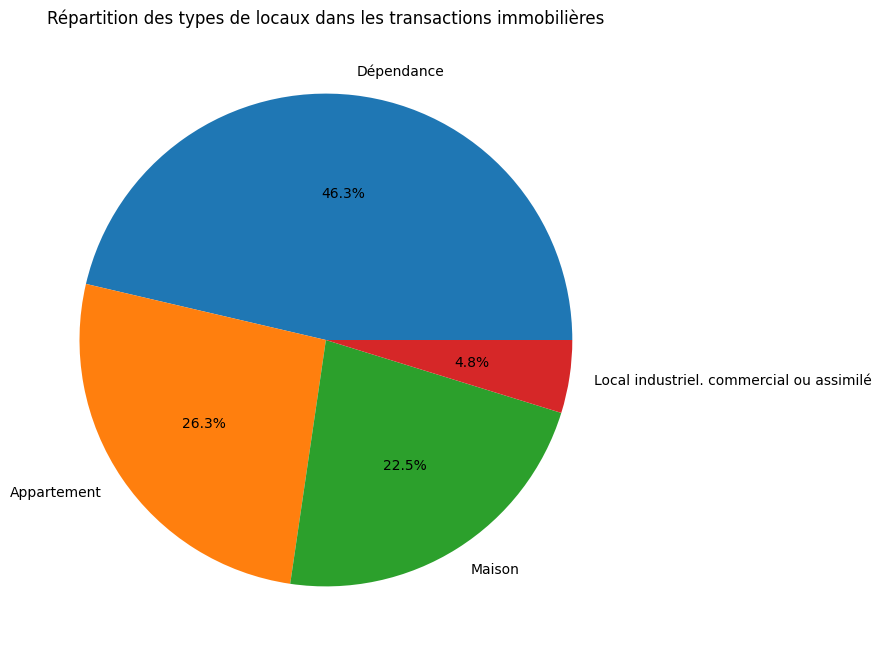

In [ ]:
# Compter le nombre de transactions par type de local
counts = df['Type local'].value_counts()

plt.figure(figsize=(12,8))
# Créer un diagramme circulaire
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

# Ajouter un titre
plt.title('Répartition des types de locaux dans les transactions immobilières')

# Afficher le diagramme
plt.show()

**Diagramme en barres du nombre de pièces principales par type de local**

Ce diagramme permet de visualiser la répartition du nombre de pièces principales des propriétés par type de local. Cela peut aider à identifier les configurations de propriétés les plus courantes dans la région.


In [ ]:
max_pieces = df['Nombre pieces principales'].max()
print("Nombre de pièce max:",max_pieces)

Nombre de pièce max: 63.0


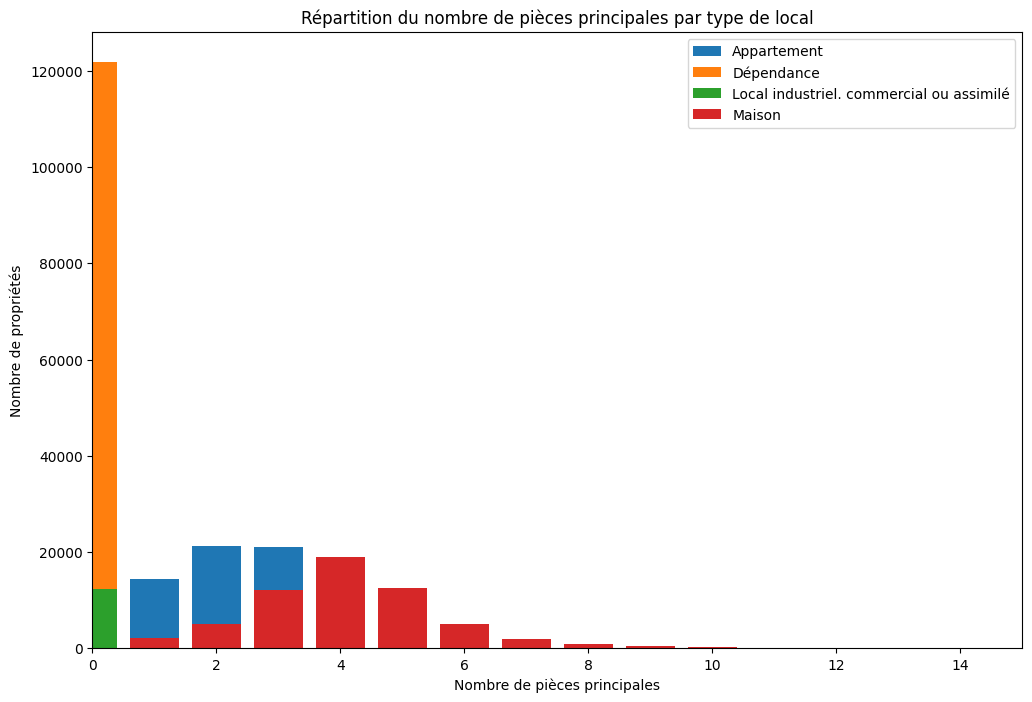

In [ ]:
# Sélectionner les colonnes pertinentes
data = df[['Type local', 'Nombre pieces principales']]

# Regrouper les données par type de local et nombre de pièces principales
grouped_data = data.groupby(['Type local', 'Nombre pieces principales']).size().reset_index(name='count')

plt.figure(figsize=(12,8))
# Créer un diagramme en barres pour chaque type de local
for local_type in grouped_data['Type local'].unique():
    # Filtrer les données pour le type de local actuel
    local_data = grouped_data[grouped_data['Type local'] == local_type]
   
    # Créer un diagramme en barres pour le type de local actuel
    plt.bar(local_data['Nombre pieces principales'], local_data['count'], label=local_type)

# Ajouter un titre et des étiquettes d'axe
plt.title('Répartition du nombre de pièces principales par type de local')
plt.xlabel('Nombre de pièces principales')
plt.ylabel('Nombre de propriétés')
plt.legend()
plt.xlim(0, 15)
# Afficher le diagramme en barres
plt.show()

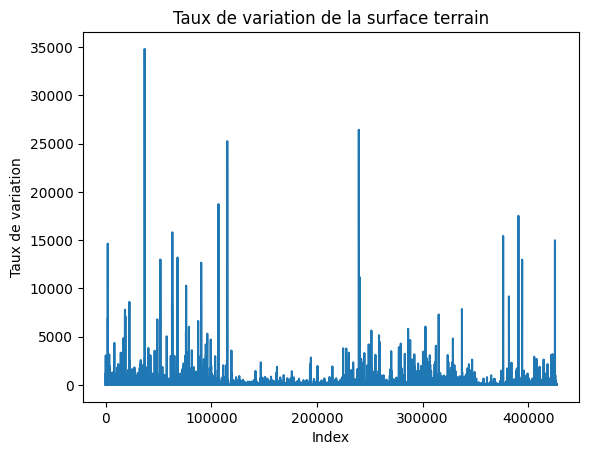

In [ ]:
# Créer un index numérique factice
df['Index'] = range(1, len(df) + 1)

# Trier les données par ordre croissant d'index
df.sort_values('Index', inplace=True)

# Calculer les taux de variation de la surface terrain
df['Variation'] = df['Surface terrain'].pct_change()

# Créer le graphique en ligne
plt.plot(df['Index'], df['Variation'])

# Définir les titres et étiquettes des axes
plt.title('Taux de variation de la surface terrain')
plt.xlabel('Index')
plt.ylabel('Taux de variation')

# Afficher le graphique
plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap

# Centrer la carte sur une région donnée
latitude = 45.764043
longitude = 4.835659

# Créer une carte basée sur la latitude et la longitude des ventes
m = folium.Map(location=[latitude, longitude], zoom_start=12)

# Créer une couche de chaleur (heatmap) basée sur les prix de vente
heat_data = [[row['Latitude'], row['Longitude'], row['Prix de vente']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Afficher la carte
m.save('carte_thermique.html')

KeyError: ignored

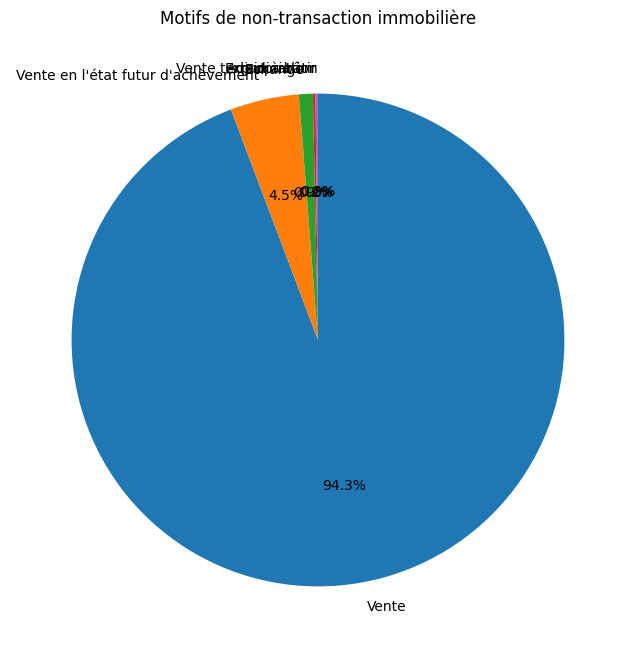

In [ ]:
# Sélectionner la colonne 'Nature mutation' et compter les occurrences de chaque motif
non_transaction_counts = df['Nature mutation'].value_counts()

# Créer le diagramme en rosace
plt.figure(figsize=(8, 8))
plt.pie(non_transaction_counts, labels=non_transaction_counts.index, startangle=90, counterclock=False, autopct='%1.1f%%')

# Ajouter un titre
plt.title("Motifs de non-transaction immobilière")

# Afficher le diagramme
plt.show()

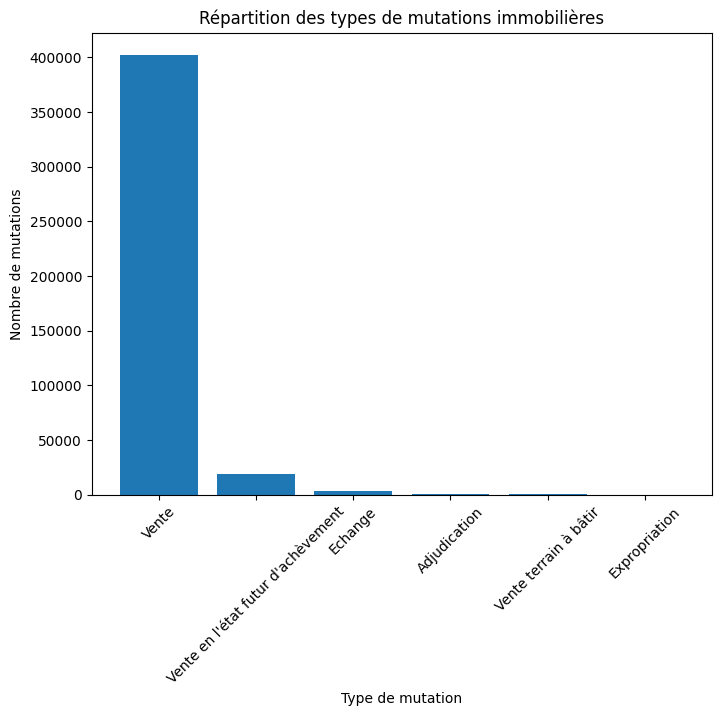

In [ ]:

# Sélectionner la colonne 'Nature mutation' et compter les occurrences de chaque type
mutation_counts = df['Nature mutation'].value_counts()

# Créer le graphique en barres empilées
plt.figure(figsize=(8, 6))
plt.bar(mutation_counts.index, mutation_counts.values)

# Définir les titres et étiquettes des axes
plt.title('Répartition des types de mutations immobilières')
plt.xlabel('Type de mutation')
plt.ylabel('Nombre de mutations')

# Faire pivoter les étiquettes des xticks pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

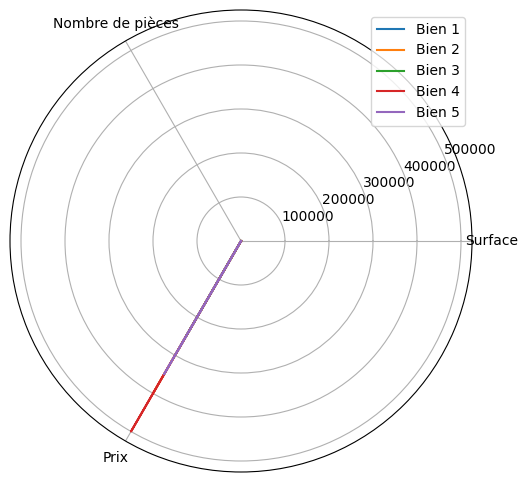

In [ ]:

# Créer un échantillon de données représentant les caractéristiques des biens
surface = [120, 150, 90, 200, 160]
nombre_pieces = [4, 5, 3, 6, 4]
prix = [300000, 400000, 250000, 500000, 350000]

# Définir les noms des caractéristiques
caracteristiques = ['Surface', 'Nombre de pièces', 'Prix']

# Transposer les données
donnees = np.array([surface, nombre_pieces, prix]).T

# Calculer le nombre de caractéristiques
nb_caracteristiques = len(caracteristiques)

# Calculer les angles pour les axes du graphique en radar
angles = np.linspace(0, 2*np.pi, nb_caracteristiques, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

# Créer la figure et les sous-graphiques pour le graphique en radar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})

# Tracer les axes du graphique en radar
ax.set_xticks(angles[:-1])
ax.set_xticklabels(caracteristiques)

# Tracer les données sous forme de graphique en radar
for i in range(len(donnees)):
    # Ajuster la dimension des données
    data = np.concatenate((donnees[i], [donnees[i][0]]))
    # Tracer la ligne du graphique en radar
    ax.plot(angles, data)

# Ajouter une légende
ax.legend(['Bien 1', 'Bien 2', 'Bien 3', 'Bien 4', 'Bien 5'])

# Afficher le graphique en radar
plt.show()

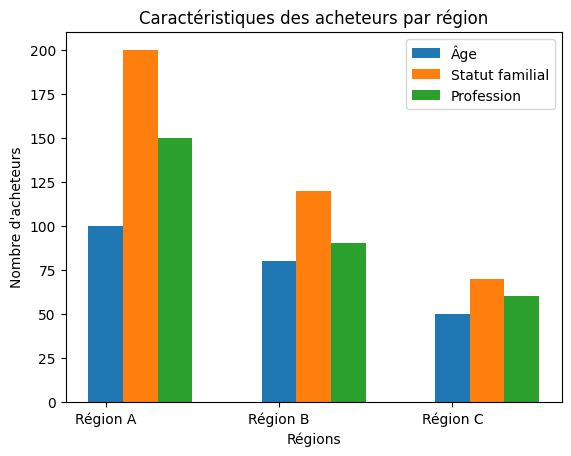

In [ ]:
# Préparez vos données
caracteristiques_acheteurs = ['Âge', 'Statut familial', 'Profession']
regions = ['Région A', 'Région B', 'Région C']
donnees = np.array([[100, 200, 150], [80, 120, 90], [50, 70, 60]])

# Créez le graphique en barres
fig, ax = plt.subplots()
x = np.arange(len(regions))
width = 0.2

for i in range(len(caracteristiques_acheteurs)):
    ax.bar(x + i * width, donnees[:, i], width, label=caracteristiques_acheteurs[i])

# Personnalisez le graphique
ax.set_xticks(x)
ax.set_xticklabels(regions)
ax.set_xlabel('Régions')
ax.set_ylabel('Nombre d\'acheteurs')
ax.set_title('Caractéristiques des acheteurs par région')
ax.legend()

# Affichez le graphique
plt.show()





TypeError: ignored

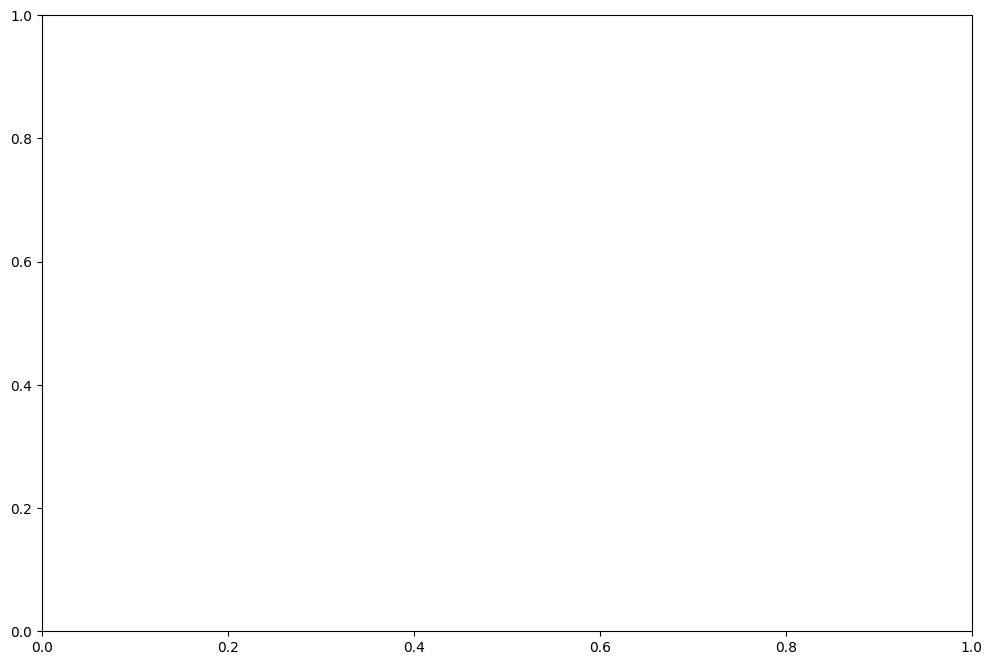

In [ ]:
# Extraction des caractéristiques et des prix de vente
caracteristiques = df[['Nombre de lots', 'Code type local', 'Surface reelle bati']]
prix_vente = df['Valeur fonciere']

# Création du nuage de points
plt.figure(figsize=(12, 8))
plt.scatter(caracteristiques['Nombre de lots'], prix_vente, label='Nombre de lots')
plt.scatter(caracteristiques['Code type local'], prix_vente, label='Code type local')
plt.scatter(caracteristiques['Surface reelle bati'], prix_vente, label='Surface reelle bati')

# Personnalisation du nuage de points
plt.title('Nuage de points des prix de vente par rapport aux caractéristiques')
plt.xlabel('Caractéristiques')
plt.ylabel('Prix de vente')
plt.legend()

# Affichage du nuage de points
plt.show()

**Diagramme en secteurs de la répartition de la nature culturelle des terrains**

Ce diagramme permet de visualiser la proportion des différentes natures culturelles des terrains (agricoles, boisés, etc.) dans les transactions immobilières. Cela peut aider à identifier les tendances dans l'utilisation des terres dans la région.



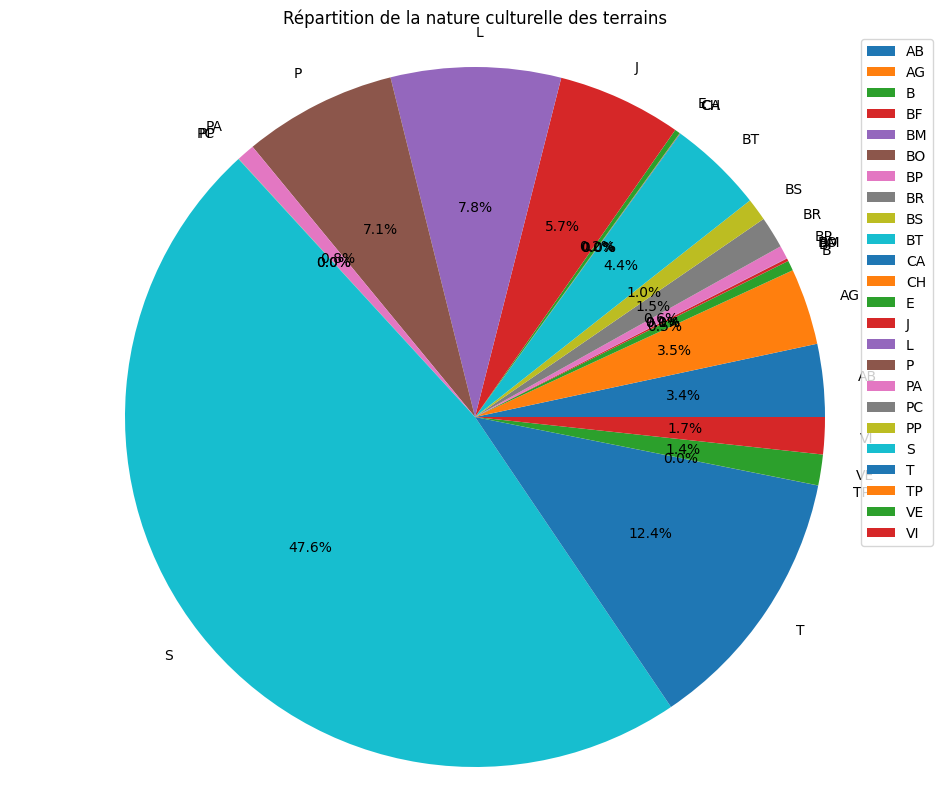

In [ ]:
# Grouper les données par nature culturelle et calculer le nombre de transactions pour chaque groupe
grouped = df.groupby('Nature culture')['Nature culture'].count()

plt.figure(figsize=(12,10))
# Créer un diagramme en secteurs
labels = grouped.index
sizes = grouped.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

# Ajouter une légende au diagramme
plt.legend(labels, loc="best")

# Afficher le diagramme
plt.title("Répartition de la nature culturelle des terrains")
plt.show()

# Section 5


Comparaisons avec l'année 2018.